# TITANIC SURVIVAL CHALLENGE

#### This project is binary classification problem, where the passenger either survived (1) or died (0). Here is a list of the columns of the dataset:
* <b>PassengerID</b> - Unique ID for each column
* <b>Survived</b> - Whether the passenger survived (1) or not (0)
* <b>Pclass</b> - Class of the passenger's ticket. Either 1, 2 or 3.
* <b>Sex</b> - Passenger's sex (male or female)
* <b>Age</b> - Passenger's age
* <b>Sibsp</b> - Number of sibling or spouses aboard the Titanic
* <b>Parch</b> - Number of parents or children aboard the Titanic
* <b>Ticket</b> - Passenger's ticket number
* <b>Fare</b> - The price paid for the passenger's ticket
* <b>Cabin</b> - Passenger's cabin number
* <b>Embarked</b> - Port where the passenger embarked. Can be:
* <b>C</b> - Cherbourg
* <b>Q</b> - Queenstown
* <b>S</b> - Southampton

#### Although we know exactly who survived the Titanic, the project is still useful to apply important concepts in data science and machine learning. So here it is!
* <b>Objective:</b> Predict which passenger survived the Titanic (Jack died)



### Techniques Used:
* Pandas, Numpy
* Matplotlib, Seaborn
* Heatmap
* Skicit-learn
* Model Selection
* Logistic Regression, KNN, Decision Trees, Random Forest, Naive Bayes, SVM
* Feature Engineering
* Feature Elimination
* Data Cleaning

## Importing Data and Libraries

In [1]:
# Import libraries for pre-processing and data visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import the dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\Dataset\titanic.csv")

## Exploratory Data Analysis

In [3]:
# Printing data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Columns in dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Print number of rows and columns
data.shape

(418, 12)

In [6]:
# Print information about various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
# Statistics of the columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Feature Engineering

### 1. Pclass

In [8]:
# Grouping of columns
print(data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean())

   Pclass  Survived
0       1  0.467290
1       2  0.322581
2       3  0.330275


### 2. Sex

In [10]:
print(data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean())

      Sex  Survived
0  female         1
1    male         0


### 3. SibSp

In [11]:
print(data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean())

   SibSp  Survived
0      0  0.310954
1      1  0.490909
2      2  0.428571
3      3  0.250000
4      4  0.250000
5      5  1.000000
6      8  0.500000


### 4. Parch

In [12]:
print(data[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean())

   Parch  Survived
0      0  0.305556
1      1  0.538462
2      2  0.606061
3      3  0.666667
4      4  1.000000
5      5  0.000000
6      6  0.000000
7      9  0.500000


### 5. Embarked

In [13]:
print(data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean())

  Embarked  Survived
0        C  0.392157
1        Q  0.521739
2        S  0.325926


## Data Visualization

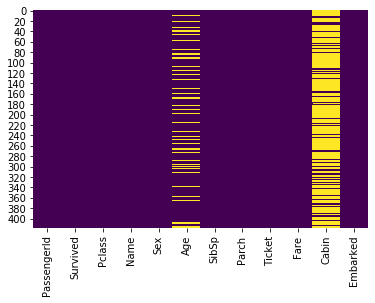

In [14]:
# Checking the null values in different columns
sns.heatmap(data=data.isnull(),cbar=False, cmap="viridis")

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

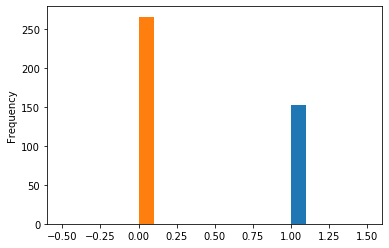

In [18]:
data["Survived"].groupby(data["Sex"]).plot(kind="hist")

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

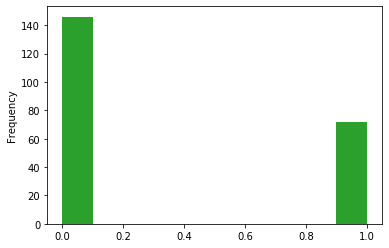

In [19]:
data["Survived"].groupby(data["Pclass"]).plot(kind="hist")

Parch
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

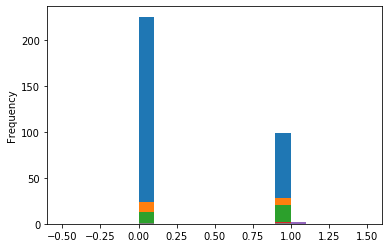

In [20]:
data["Survived"].groupby(data["Parch"]).plot(kind="hist")

SibSp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

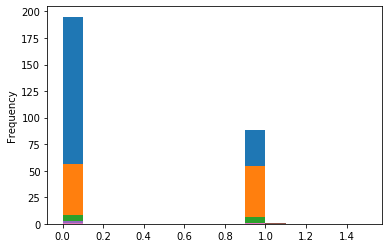

In [21]:
data["Survived"].groupby(data["SibSp"]).plot(kind="hist")

Embarked
C    AxesSubplot(0.125,0.125;0.775x0.755)
Q    AxesSubplot(0.125,0.125;0.775x0.755)
S    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

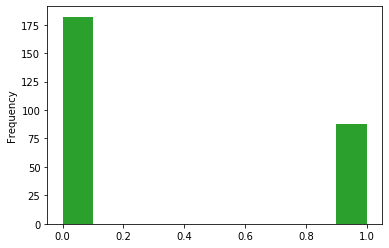

In [22]:
data["Survived"].groupby(data["Embarked"]).plot(kind="hist")

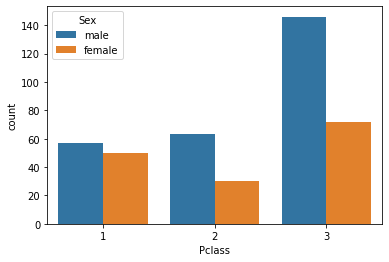

In [23]:
sns.countplot("Pclass", data=data, hue="Sex")

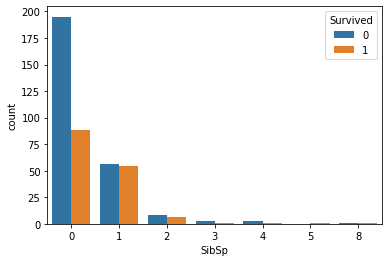

In [24]:
sns.countplot("SibSp", data=data, hue='Survived')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCCD835648>]],
      dtype=object)

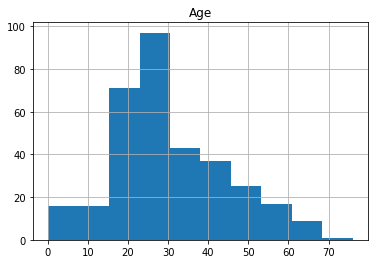

In [25]:
data.hist("Age")

## Data Cleaning

In [26]:
# Drop column "Cabin"
data.drop(["Cabin"], inplace=True, axis=1)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [28]:
# Drop column "Embarked"
data.drop(["Embarked"], inplace=True, axis=1)

In [29]:
# Handling Missing Values
data.Age.fillna(np.mean(data.Age), inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


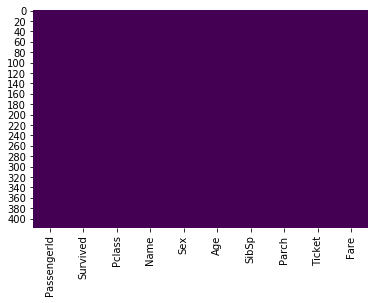

In [31]:
# Checking again missing or null values
sns.heatmap(data=data.isnull(),cbar=False, cmap="viridis")

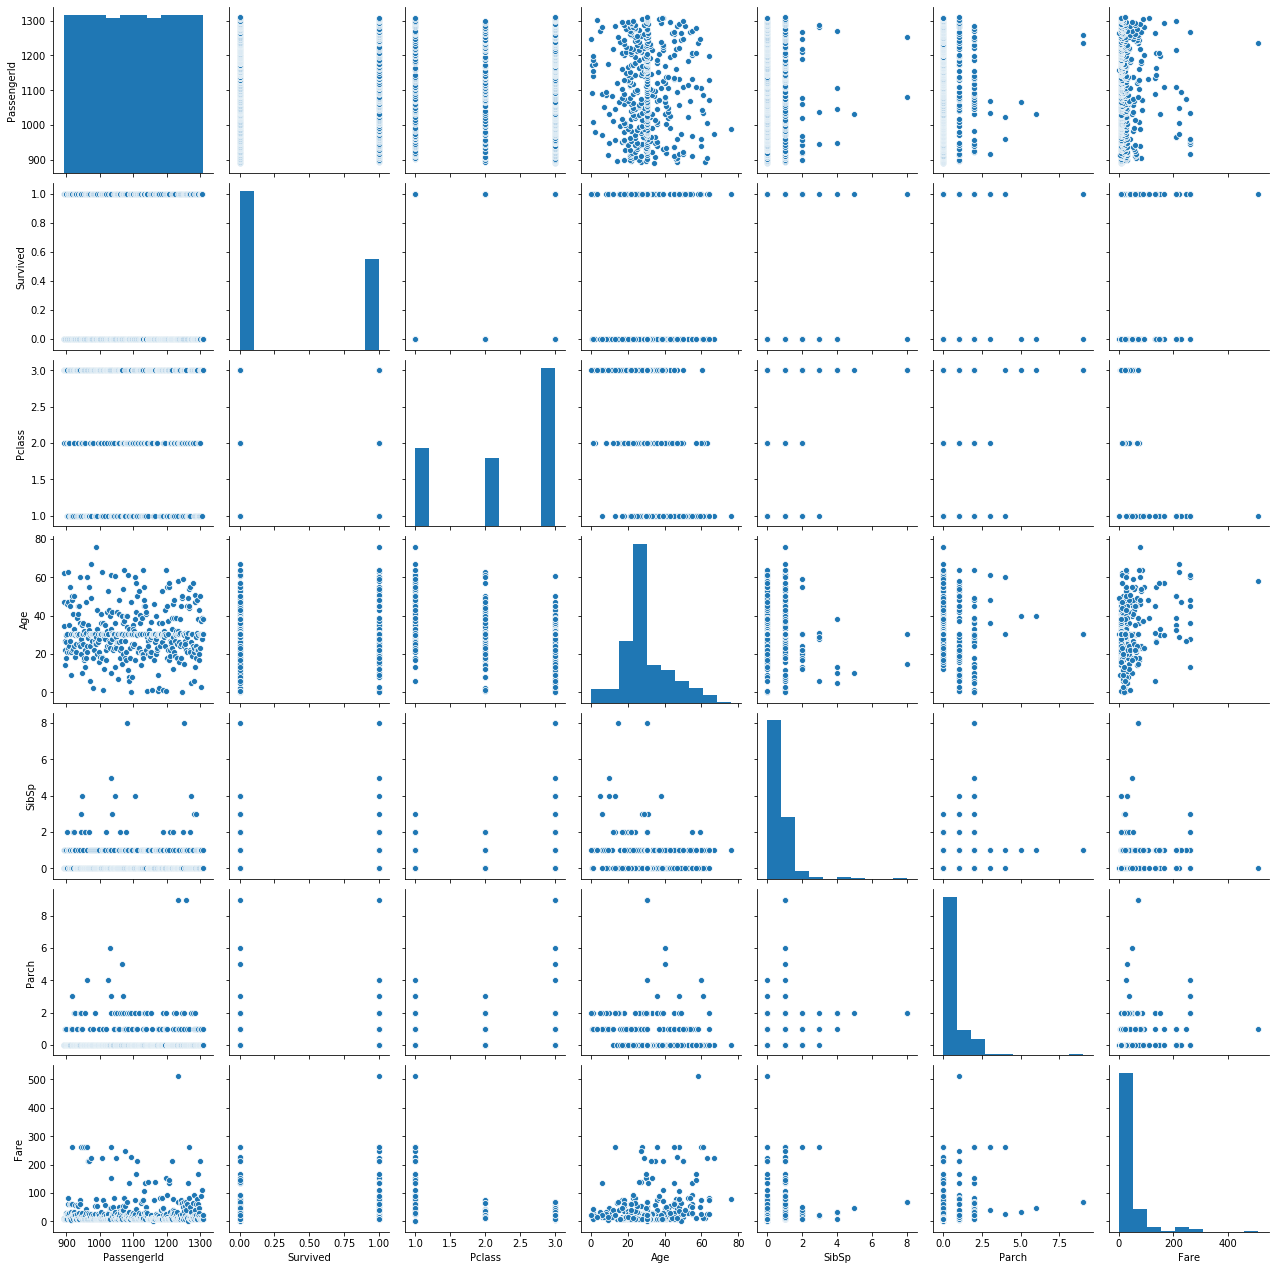

In [32]:
sns.pairplot(data)

In [81]:
# Converting "Sex" Column in categorical variable
le = LabelEncoder()
data.Sex = le.fit_transform(data["Sex"])

In [82]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875


In [83]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

## Feature Selection and Data Splitting

In [84]:
# Selecting features and target variable
X = data.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = data[["Survived"]]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Split data into train and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training and Predicting

### Classification Algorithms Used:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Naive Bayes
* Support Vector Machine
* K Nearest Neighbors

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model1 = LogisticRegression()

In [89]:
model1.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predict = model1.predict(X_test)

In [91]:
print((model1.score(X_test, y_test)*100), "%")

100.0 %


In [92]:
print(predict[:10])
# impor
print(y_test[:10])

[0 1 0 0 1 0 1 0 1 0]
     Survived
321         0
324         1
388         0
56          0
153         1
30          0
72          1
82          0
258         1
416         0


In [93]:
# Importing evaluation Metrics
from sklearn.metrics import classification_report, f1_score, confusion_matrix, log_loss,jaccard_similarity_score, accuracy_score

### Evaluation Metrics

In [94]:
print("Classification Report")
print(classification_report(y_test, predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict))
print("F1- Score")
print(f1_score(y_test, predict))
print("Log Loss")
print(log_loss(y_test, predict))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict))
print("Accuracy Score")
print(accuracy_score(y_test, predict))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Confusion Matrix
[[92  0]
 [ 0 46]]
F1- Score
1.0
Log Loss
9.992007221626415e-16
Jaccard Similarity Index
1.0
Accuracy Score
1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model2 = DecisionTreeClassifier()

In [97]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predict2 = model2.predict(X_test)

In [99]:
model2.score(X_test, y_test)

1.0

### Evaluation Metrics

In [100]:
print("Classification Report")
print(classification_report(y_test, predict2))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict2))
print("F1- Score")
print(f1_score(y_test, predict2))
print("Log Loss")
print(log_loss(y_test, predict2))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict2))
print("Accuracy Score")
print(accuracy_score(y_test, predict2))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Confusion Matrix
[[92  0]
 [ 0 46]]
F1- Score
1.0
Log Loss
9.992007221626415e-16
Jaccard Similarity Index
1.0
Accuracy Score
1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Support Vector Machine

In [101]:
from sklearn.svm import SVC

In [102]:
model3 = SVC()

In [103]:
model3.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
predict3 = model3.predict(X_test)

In [105]:
model3.score(X_test, y_test)

0.6666666666666666

### Evaluation Metrics

In [106]:
print("Classification Report")
print(classification_report(y_test, predict3))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict3))
print("F1- Score")
print(f1_score(y_test, predict3))
print("Log Loss")
print(log_loss(y_test, predict3))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict3))
print("Accuracy Score")
print(accuracy_score(y_test, predict3))

Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        92
           1       0.00      0.00      0.00        46

    accuracy                           0.67       138
   macro avg       0.33      0.50      0.40       138
weighted avg       0.44      0.67      0.53       138

Confusion Matrix
[[92  0]
 [46  0]]
F1- Score
0.0
Log Loss
11.512925464970227
Jaccard Similarity Index
0.6666666666666666
Accuracy Score
0.6666666666666666


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
model4 = RandomForestClassifier()

In [109]:
model4.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
predict4 = model4.predict(X_test)

In [111]:
model4.score(X_test, y_test)

1.0

### Evaluation Metrics

In [112]:
print("Classification Report")
print(classification_report(y_test, predict4))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict4))
print("F1- Score")
print(f1_score(y_test, predict4))
print("Log Loss")
print(log_loss(y_test, predict4))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict4))
print("Accuracy Score")
print(accuracy_score(y_test, predict4))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Confusion Matrix
[[92  0]
 [ 0 46]]
F1- Score
1.0
Log Loss
9.992007221626415e-16
Jaccard Similarity Index
1.0
Accuracy Score
1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model5 = GaussianNB()

In [115]:
model5.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
predict5 = model5.predict(X_test)

In [117]:
model5.score(X_test, y_test)

1.0

### Evaluation Metrics

In [118]:
print("Classification Report")
print(classification_report(y_test, predict5))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict5))
print("F1- Score")
print(f1_score(y_test, predict5))
print("Log Loss")
print(log_loss(y_test, predict5))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict5))
print("Accuracy Score")
print(accuracy_score(y_test, predict5))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Confusion Matrix
[[92  0]
 [ 0 46]]
F1- Score
1.0
Log Loss
9.992007221626415e-16
Jaccard Similarity Index
1.0
Accuracy Score
1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## K Nearest Neighbors

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
model6 = KNeighborsClassifier(4)

In [121]:
model6.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [122]:
predict6 = model6.predict(X_test)

In [123]:
model6.score(X_test, y_test)

0.7536231884057971

### Evaluation Metrics

In [124]:
print("Classification Report")
print(classification_report(y_test, predict6))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict6))
print("F1- Score")
print(f1_score(y_test, predict6))
print("Log Loss")
print(log_loss(y_test, predict6))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict6))
print("Accuracy Score")
print(accuracy_score(y_test, predict6))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        92
           1       0.83      0.33      0.47        46

    accuracy                           0.75       138
   macro avg       0.79      0.65      0.65       138
weighted avg       0.77      0.75      0.72       138

Confusion Matrix
[[89  3]
 [31 15]]
F1- Score
0.46875000000000006
Log Loss
8.50957098709604
Jaccard Similarity Index
0.7536231884057971
Accuracy Score
0.7536231884057971


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Classifiers Comparison

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\hp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

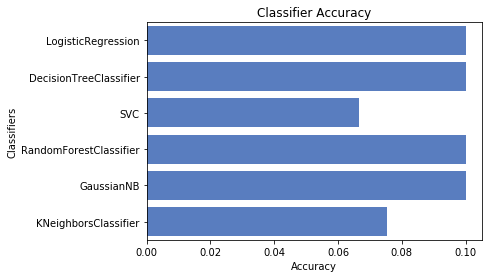

In [125]:
classifiers = [model1, model2, model3, model4, model5, model6]
result_col = ["Classifiers", "Accuracy"]
result = pd.DataFrame(columns=result_col)
acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test,predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    result_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=result_col)
    result = result.append(result_entry)
    
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifiers', data=result, color="b")

In [126]:
result

,Classifiers,Accuracy
0,LogisticRegression,0.100000
0,DecisionTreeClassifier,0.100000
0,SVC,0.066667
0,RandomForestClassifier,0.100000
0,GaussianNB,0.100000
0,KNeighborsClassifier,0.075362


#### Hence Best classifier among above classifiers for this problem is Random forest Classifier

--------------------------------------------------------------------------------------------------------------------------------